# `nb05`: Visualizing high-dimensional data

# Dimensionality reduction

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)
X, y = digits.data, digits.target
X.shape

(1083, 64)

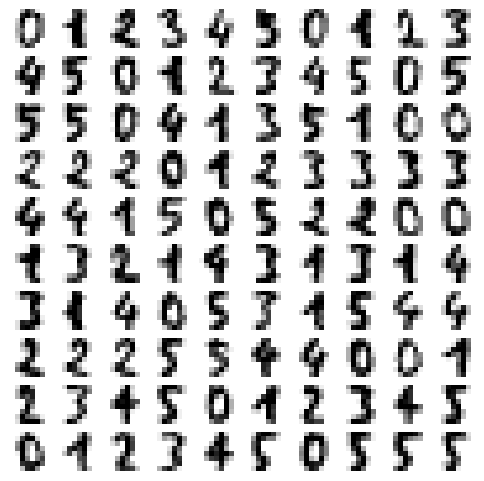

In [3]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))

for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")

plt.show()

In [4]:
# Helper
from sklearn.preprocessing import MinMaxScaler
from matplotlib import offsetbox

def plot_embedding(X):
    _, ax = plt.subplots()
    X = MinMaxScaler().fit_transform(X)

    for digit in digits.target_names:
        ax.scatter(
            *X[y == digit].T,
            marker=f"${digit}$",
            s=60,
            color=plt.cm.Dark2(digit),
            alpha=0.425,
            zorder=2,
        )
    shown_images = np.array([[1.0, 1.0]])  # just something big
    for i in range(X.shape[0]):
        # plot every digit on the embedding
        # show an annotation box for a group of digits
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < 4e-3:
            # don't show points that are too close
            continue
        shown_images = np.concatenate([shown_images, [X[i]]], axis=0)
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i]
        )
        imagebox.set(zorder=1)
        ax.add_artist(imagebox)

    ax.axis("off")
    plt.show()

## PCA

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Xt = pca.fit_transform(X)
Xt.shape

(1083, 2)

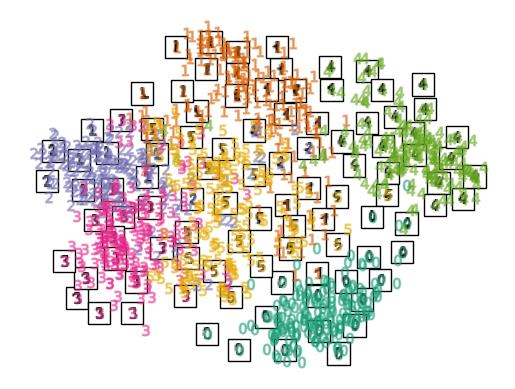

In [6]:
plot_embedding(Xt)

## t-SNE

In [7]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init="pca", learning_rate="auto")
Xt = tsne.fit_transform(X)
Xt.shape

/home/gilles/anaconda3/envs/dats0001/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


(1083, 2)

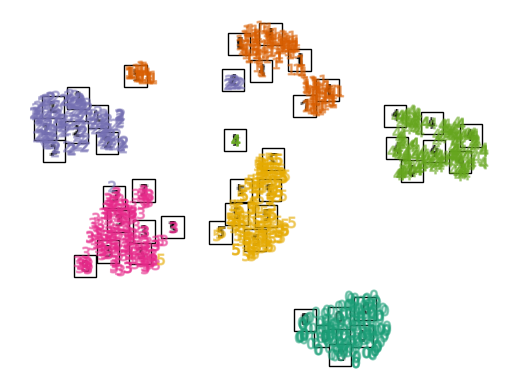

In [8]:
plot_embedding(Xt)

See also [Wattenberg et al, 2016](https://distill.pub/2016/misread-tsne/) on how to use t-SNE effectively.